# What makes people happy?

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.


**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale.


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country or region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption
- `year`  


>dataset: `happiness_clean.csv`

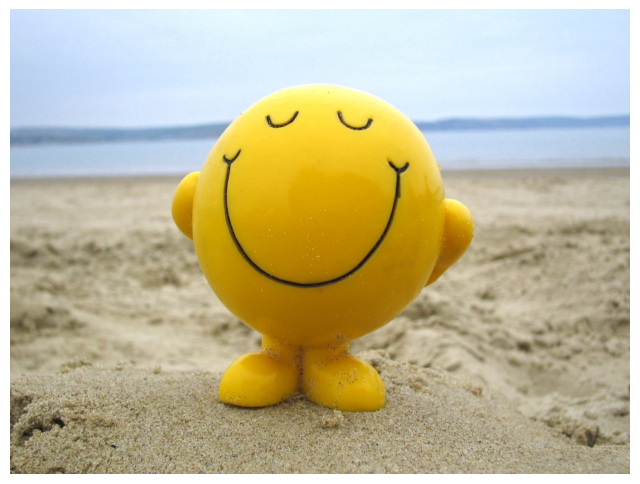

In [ ]:
image_path = '/content/drive/MyDrive/EDA_Story telling BI_moduleProject/Project 1/Vanda and Guio/happiness.jpg'

from PIL import Image
img = Image.open(image_path)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.insert (0,"/content/drive/MyDrive/EDA_Story telling BI_moduleProject/Project 1/Vanda and Guio/_functions_")
from Functions_EDA import *

In [ ]:
happy = pd.read_csv('/content/drive/MyDrive/EDA_Story telling BI_moduleProject/Project 1/Vanda and Guio/happiness_clean.csv')

In [ ]:
happy.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
happy.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018
5,6,Netherlands,7.441,1.361,1.488,0.638,0.333,0.295,2018
6,7,Canada,7.328,1.330,1.532,0.653,0.321,0.291,2018
7,8,New Zealand,7.324,1.268,1.601,0.669,0.365,0.389,2018
8,9,Sweden,7.314,1.355,1.501,0.659,0.285,0.383,2018
9,10,Australia,7.272,1.340,1.573,0.647,0.361,0.302,2018


1. Introduction to the problem
    - Not all records have data for both years 2018 and 2019
    - Health data are missing in most of countries studied
    - Subjectivity of the data
    - Data had uneven scoring scales

2. Solutions

  - Data cleaning
  - Erase health criteria for which we do not have enough data
  - Scaling





3. Hyphotheses:

  - Perception of corruption is less significant to bring happiness to the country
  - All countries perceive themselves as generous equally
  - Social support is the most important index of all
  - Asian countries and African countries have similar rate of freedom to make life choices
  - Social support and sense of freedom are interdependent



### **Hypothesis 1: Perception of corruption is less significant to bring happiness to the country.**



In [ ]:
happy_2018 = happy[happy['year'] == 2018].sort_values(by = 'Overall rank')
happy_2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...
143,151,Rwanda,3.408,0.332,0.896,0.636,0.200,0.444,2018
144,152,Yemen,3.355,0.442,1.073,0.244,0.083,0.064,2018
145,153,Tanzania,3.303,0.455,0.991,0.481,0.270,0.097,2018
146,154,South Sudan,3.254,0.337,0.608,0.112,0.224,0.106,2018


In [ ]:
happy_2018['Perceptions of corruption'].describe()

,Perceptions of corruption
count,148.000000
mean,0.113324
std,0.097881
min,0.000000
25%,0.051000
50%,0.082000
75%,0.136500
max,0.457000


In [ ]:
Q1,Q3 = np.percentile(happy_2018['Perceptions of corruption'], [25,75])
print('Q1 is:', Q1)
print('Q3 is:', Q3)

Q1 is: 0.051
Q3 is: 0.1365


In [ ]:
#both extremes of corruption values
condi1 = (happy_2018['Perceptions of corruption'] < 0.051) | (happy_2018['Perceptions of corruption'] > 0.1365)
happy_2018_condi1 = happy_2018.loc[condi1]
extreme_head = happy_2018_condi1.head(5)
extreme_tail = happy_2018_condi1.tail(5)
extremes = pd.concat([extreme_head,extreme_tail])

In [ ]:
fig = px.bar(extremes, x = 'Country or region', y = ["Perceptions of corruption","Score"])
fig.update_layout(barmode='group')
fig.update_layout(title_text='Country perceptions on corruption 2018')

fig.show()

In [ ]:
happy_2019 = happy[happy['year'] == 2019].sort_values(by = 'Overall rank')

In [ ]:
happy_2019.shape

(148, 9)

In [ ]:
Q1,Q3 = np.percentile(happy_2019['Perceptions of corruption'], [25,75])
print('Q1 is:', Q1)
print('Q3 is:', Q3)

Q1 is: 0.04925
Q3 is: 0.1405


In [ ]:
#both extremes of corruption values
condi12 = (happy_2019['Perceptions of corruption'] < 0.04925) | (happy_2019['Perceptions of corruption'] > 0.1405)
happy_2019_condi12 = happy_2019.loc[condi12]
extreme_head2 = happy_2019_condi12.head(5)
extreme_tail2 = happy_2019_condi12.tail(5)
extremes2 = pd.concat([extreme_head2,extreme_tail2])

In [ ]:
fig = px.bar(extremes2, x = 'Country or region', y = ["Perceptions of corruption","Score"])
fig.update_layout(barmode='group')
fig.update_layout(title_text='Country perceptions on corruption 2019')

fig.show()

## CONCLUSION:Wrong. As we can see that countries who have lower perception of corruption have the highest overal scores. European countries perceive corruption as less emerging in their lands compared to African countries; and the top 10 happiest countries are occupied by mostly Europeans.

### **Hypothesis 2: All countries perceive themselves as generous equally.**

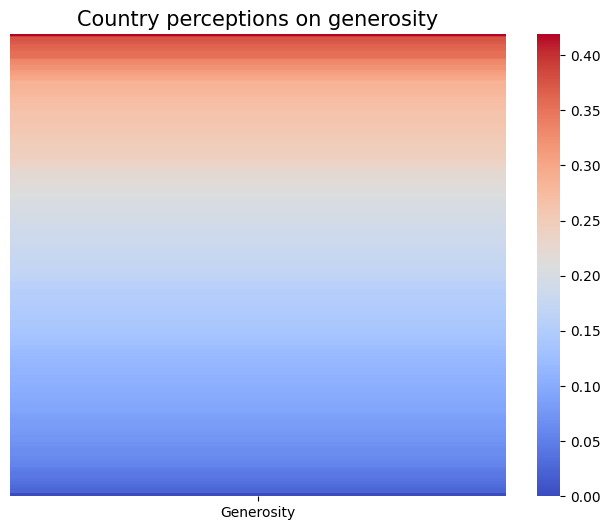

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(happy.iloc[:,6:7].sort_values(by='Generosity', ascending=False), yticklabels=False, cbar=True, cmap='coolwarm')
plt.title("Country perceptions on generosity", fontsize =15)
plt.show()

In [ ]:
happy_pivot = happy.pivot(index='Country or region', columns='year', values='Generosity')
happy_pivot['mean_Generosity'] = happy_pivot.mean(axis=1)
happy_pivot = happy_pivot.sort_values(by='mean_Generosity', ascending=False).drop(columns='mean_Generosity')
happy_pivot

year,2018,2019
Country or region,,
Haiti,0.392,0.419
Malta,0.376,0.375
Bhutan,0.364,0.370
Kenya,0.352,0.372
Thailand,0.364,0.359
...,...,...
Lithuania,0.026,0.043
Botswana,0.042,0.025
Azerbaijan,0.031,0.035


In [ ]:
happy_pivot.isnull().sum()

,0
year,
2018,5
2019,5


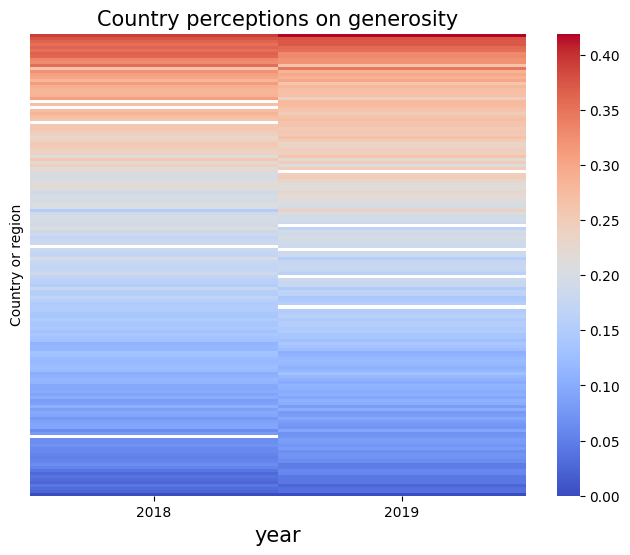

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(happy_pivot, yticklabels=False, cbar=True, cmap='coolwarm')
plt.title("Country perceptions on generosity", fontsize =15)
plt.xlabel('year', fontsize = 15)
plt.show()

### CONCLUSION:  No, the countries do not see themselves as generous in an equal weight. Moreover, none of them has value over than 0,5 which means their perceptions of generosity is quite low and this is not key index to the total score.

###**Hypothesis 3: Social support is the most important index of all.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['GDP per capita','Social support', 'Freedom to make life choices', 'Generosity','Perceptions of corruption']
happy[columns_to_scale] = pd.DataFrame(scaler.fit_transform(happy[columns_to_scale]))
happy_scale = happy[columns_to_scale]
happy_scale

,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.774941,0.955556,0.938484,0.482100,0.859956
1,0.864608,0.947009,0.945637,0.682578,0.743982
2,0.802257,0.953846,0.941345,0.677804,0.892779
3,0.797506,1.000000,0.932761,0.842482,0.301969
4,0.843230,0.918803,0.908441,0.610979,0.781182
...,...,...,...,...,...
291,0.618171,0.573504,0.615165,0.059666,0.218818
292,0.113420,0.073504,0.597997,0.520286,0.194748
293,0.170428,0.588889,0.168813,0.257757,0.168490
294,0.213183,0.202564,0.758226,0.517900,0.899344


In [ ]:
happyrest = ['Country or region', 'Overall rank', 'Score', 'year']
happy_therest = happy[happyrest]
happy_therest

,Country or region,Overall rank,Score,year
0,Finland,1,7.632,2018
1,Norway,2,7.594,2018
2,Denmark,3,7.555,2018
3,Iceland,4,7.495,2018
4,Switzerland,5,7.487,2018
...,...,...,...,...
291,Botswana,148,3.488,2019
292,Malawi,150,3.410,2019
293,Yemen,151,3.380,2019
294,Rwanda,152,3.334,2019


In [ ]:
fig3 = px.box(happy_scale)
fig3.update_layout(title_text='Relevance of different criteria within the same scale', title_x = 0.5)
fig3.show()

CONCLUSION: Yes, it seems that Social support ranks as the most relevant criteria among all.

###**Hypothesis 4: Asian countries and African countries have similar rate of freedom to make life choices.**

In [ ]:
fig4 = px.choropleth(happy, locations="Country or region",locationmode="country names",color="Freedom to make life choices")
fig4.update_layout(title_text='Distribution of freedom to make life choices across countries', title_x = 0.45)
fig4.show()

In [ ]:
fig42 = px.scatter_geo(happy, locations="Country or region", locationmode="country names", color="Freedom to make life choices", size='Freedom to make life choices')

fig42.update_layout(title_text = 'Freedom to make life choices in the world')

fig42.show()

## CONCLUSION : No, overall Asian countries are enjoying higher freedom of choice than African countries.

###**Hypothesis 5: Social support and sense of freedom are correlated.**

In [ ]:
happy2018_corr = happy_2018.corr(numeric_only=True)

<Axes: >

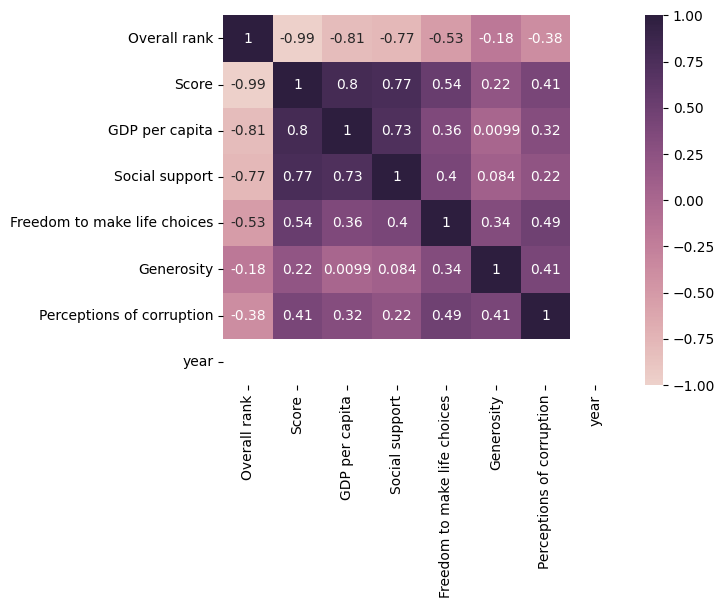

In [ ]:
sns.heatmap(happy2018_corr,vmax=1, vmin=-1,annot = True, center=0, cmap=sns.cubehelix_palette(as_cmap=True))

### CONCLUSION : Social support and freedom have low degree of correlation with each other (0.4).

STRUGGLES

1. Incomplete data
2. Trying to find the most representative visualization to support the hypothesis  
3. Translate what we have in mind to a piece of code

LESSONS LEARNT
1. To see the actual results and added value of data analysis for companies and organizations
2. Finding measurable and specific conclusions based on tested hypotheses
3. See the bigger picture based on reduced samples